In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/train.csv')
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [ ]:
df2 = pd.read_csv('/content/train_label.csv')
df2

,504
0,5
1,139
2,209
3,184
4,791
...,...
8702,13
8703,11
8704,1
8705,92


In [ ]:
df = pd.concat([df1,df2],axis=1)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,504
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5.0
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,139.0
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,209.0
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,184.0
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,791.0
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,11.0
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,1.0
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,92.0
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,31.0


One hot Encoding

In [ ]:
df.shape

(8708, 10)

In [ ]:
df['datetime'].dtype

dtype('O')

In [ ]:
df['season'].dtype

dtype('O')

In [ ]:
df['holiday'].dtype

dtype('int64')

In [ ]:
df['workingday'].dtype

dtype('int64')

In [ ]:
df['humidity'].dtype

dtype('int64')

In [ ]:
df['temp'].dtype

dtype('float64')

In [ ]:
df['weather'].dtype

dtype('O')

In [ ]:
df['windspeed'].dtype

dtype('float64')

In [ ]:
df['504'].dtype

dtype('float64')

c. Check the missing values present in the dataset

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
504           1
dtype: int64

In [ ]:
mean_value = df['504'].mean()

In [ ]:
df['504'].fillna(value=mean_value,inplace=True)

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
504           0
dtype: int64

**3) Feature Engineering**

A)Create new columns date, hour, weekDay, month from datetime column

In [ ]:
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['weekday'] = pd.DatetimeIndex(df['datetime']).weekday

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,504,year,hour,month,weekday
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5.000000,2012,19,5,2
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,139.000000,2012,4,9,2
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,209.000000,2011,9,1,3
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,184.000000,2011,16,11,4
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,791.000000,2011,13,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,11.000000,2012,6,1,0
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,1.000000,2011,1,11,3
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,92.000000,2011,3,4,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,31.000000,2012,1,11,2


B)Coerce the datatype of season, holiday, workingday, and weather to category

In [ ]:
df['season'].dtype

dtype('O')

In [ ]:
df['holiday'].dtype

dtype('int64')

In [ ]:
df['workingday'].dtype

dtype('int64')

In [ ]:
df['weather'].dtype

dtype('O')

**C)** Drop the datetime column as we have already extracted useful features from it

In [ ]:
df.drop(['datetime'], axis=1,inplace = True)

**4) Outlier Analysis**

In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', '504', 'year', 'hour', 'month', 'weekday'],
      dtype='object')

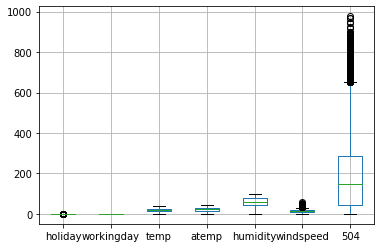

In [ ]:
boxplot = df.boxplot(column=['holiday','workingday','temp','atemp','humidity','windspeed','504'])

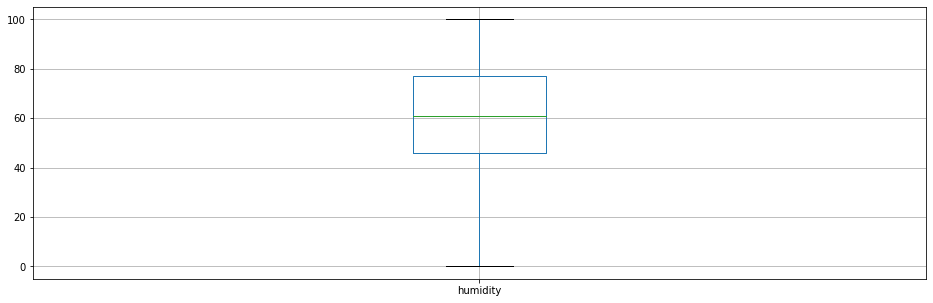

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
humidity_box = df.boxplot(column=['humidity'])

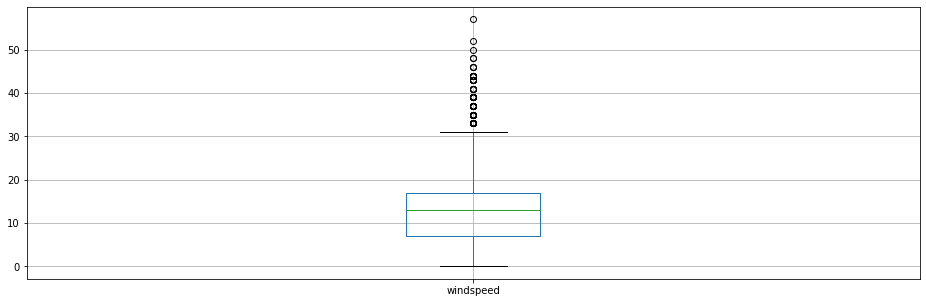

In [ ]:
plt.figure(figsize=(16,5))
windspeed_box = df.boxplot(column=['windspeed'])

In [ ]:
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3-Q1
IQR

9.996400000000001

In [ ]:
outliers = df[(df['windspeed'] <(Q1 - 1.5*IQR)) | (df['windspeed'] > (Q3+ 1.5*IQR))]

In [ ]:
outliers.index

Int64Index([  10,   32,   86,  105,  182,  218,  271,  279,  288,  316,
            ...
            8394, 8399, 8435, 8460, 8468, 8496, 8555, 8563, 8603, 8640],
           dtype='int64', length=182)

In [ ]:
df.drop(outliers.index,inplace = True)

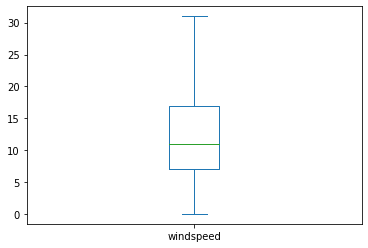

In [ ]:
df['windspeed'].plot(kind = 'box')

In [ ]:
df.rename(columns = {'504':'Total Booking'}, inplace = True)

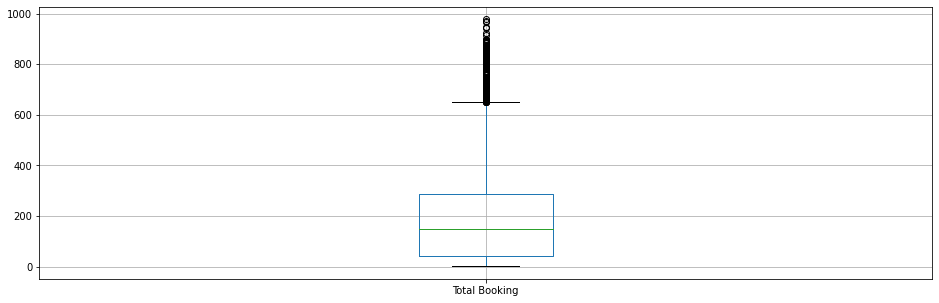

In [ ]:
plt.figure(figsize=(16,5))
cab_box = df.boxplot(column=['Total Booking'])

In [ ]:
Q1 = df['Total Booking'].quantile(0.25)
Q3 = df['Total Booking'].quantile(0.75)
IQR = Q3-Q1
IQR

243.0

In [ ]:
outliers = df[(df['Total Booking'] <(Q1 - 1.5*IQR)) | (df['Total Booking'] > (Q3+ 1.5*IQR))]

In [ ]:
outliers.index

Int64Index([   4,   26,   29,   51,   69,   81,  104,  111,  124,  132,
            ...
            8340, 8409, 8411, 8428, 8440, 8477, 8581, 8675, 8680, 8694],
           dtype='int64', length=238)

In [ ]:
df.drop(outliers.index,inplace = True)

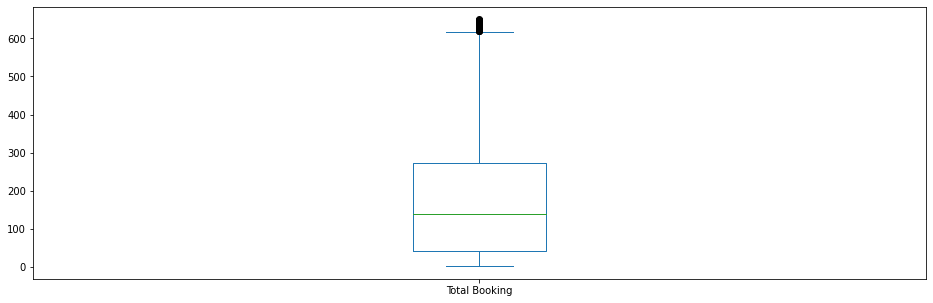

In [ ]:
plt.figure(figsize=(16,5))
df['Total Booking'].plot(kind = 'box')

5) Correlation Analysis

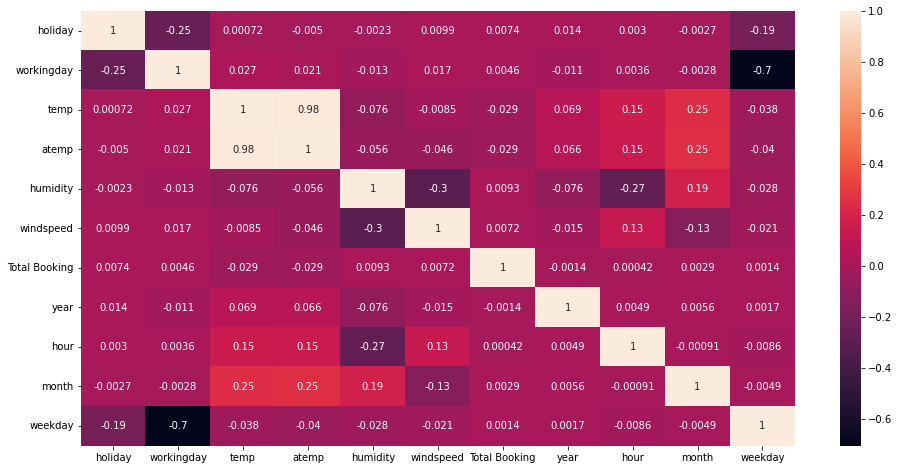

In [ ]:
import seaborn as sns
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(16,8))
sns.heatmap(df[top_features].corr(),annot=True)

In [ ]:
df.drop(['temp'],axis=1,inplace=True)

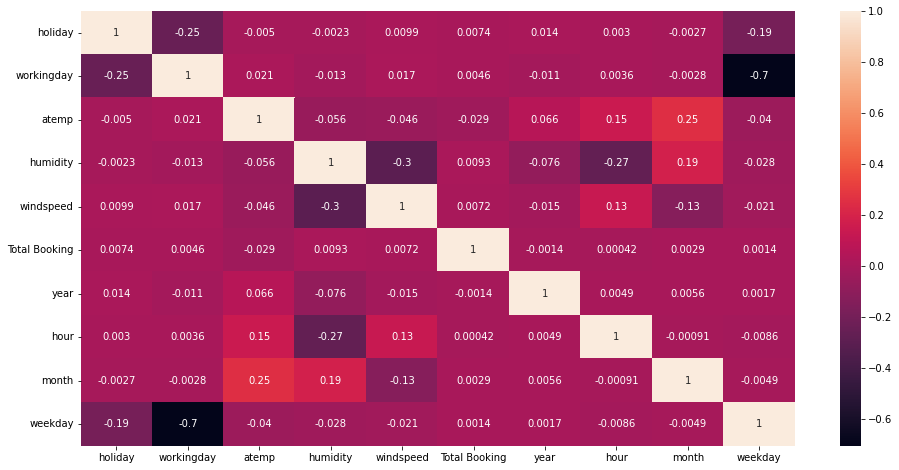

In [ ]:
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(16,8))
sns.heatmap(df[top_features].corr(),annot=True)

**6) Data Visualization**

In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'Total Booking', 'year', 'hour', 'month', 'weekday'],
      dtype='object')

In [ ]:
import seaborn as sns

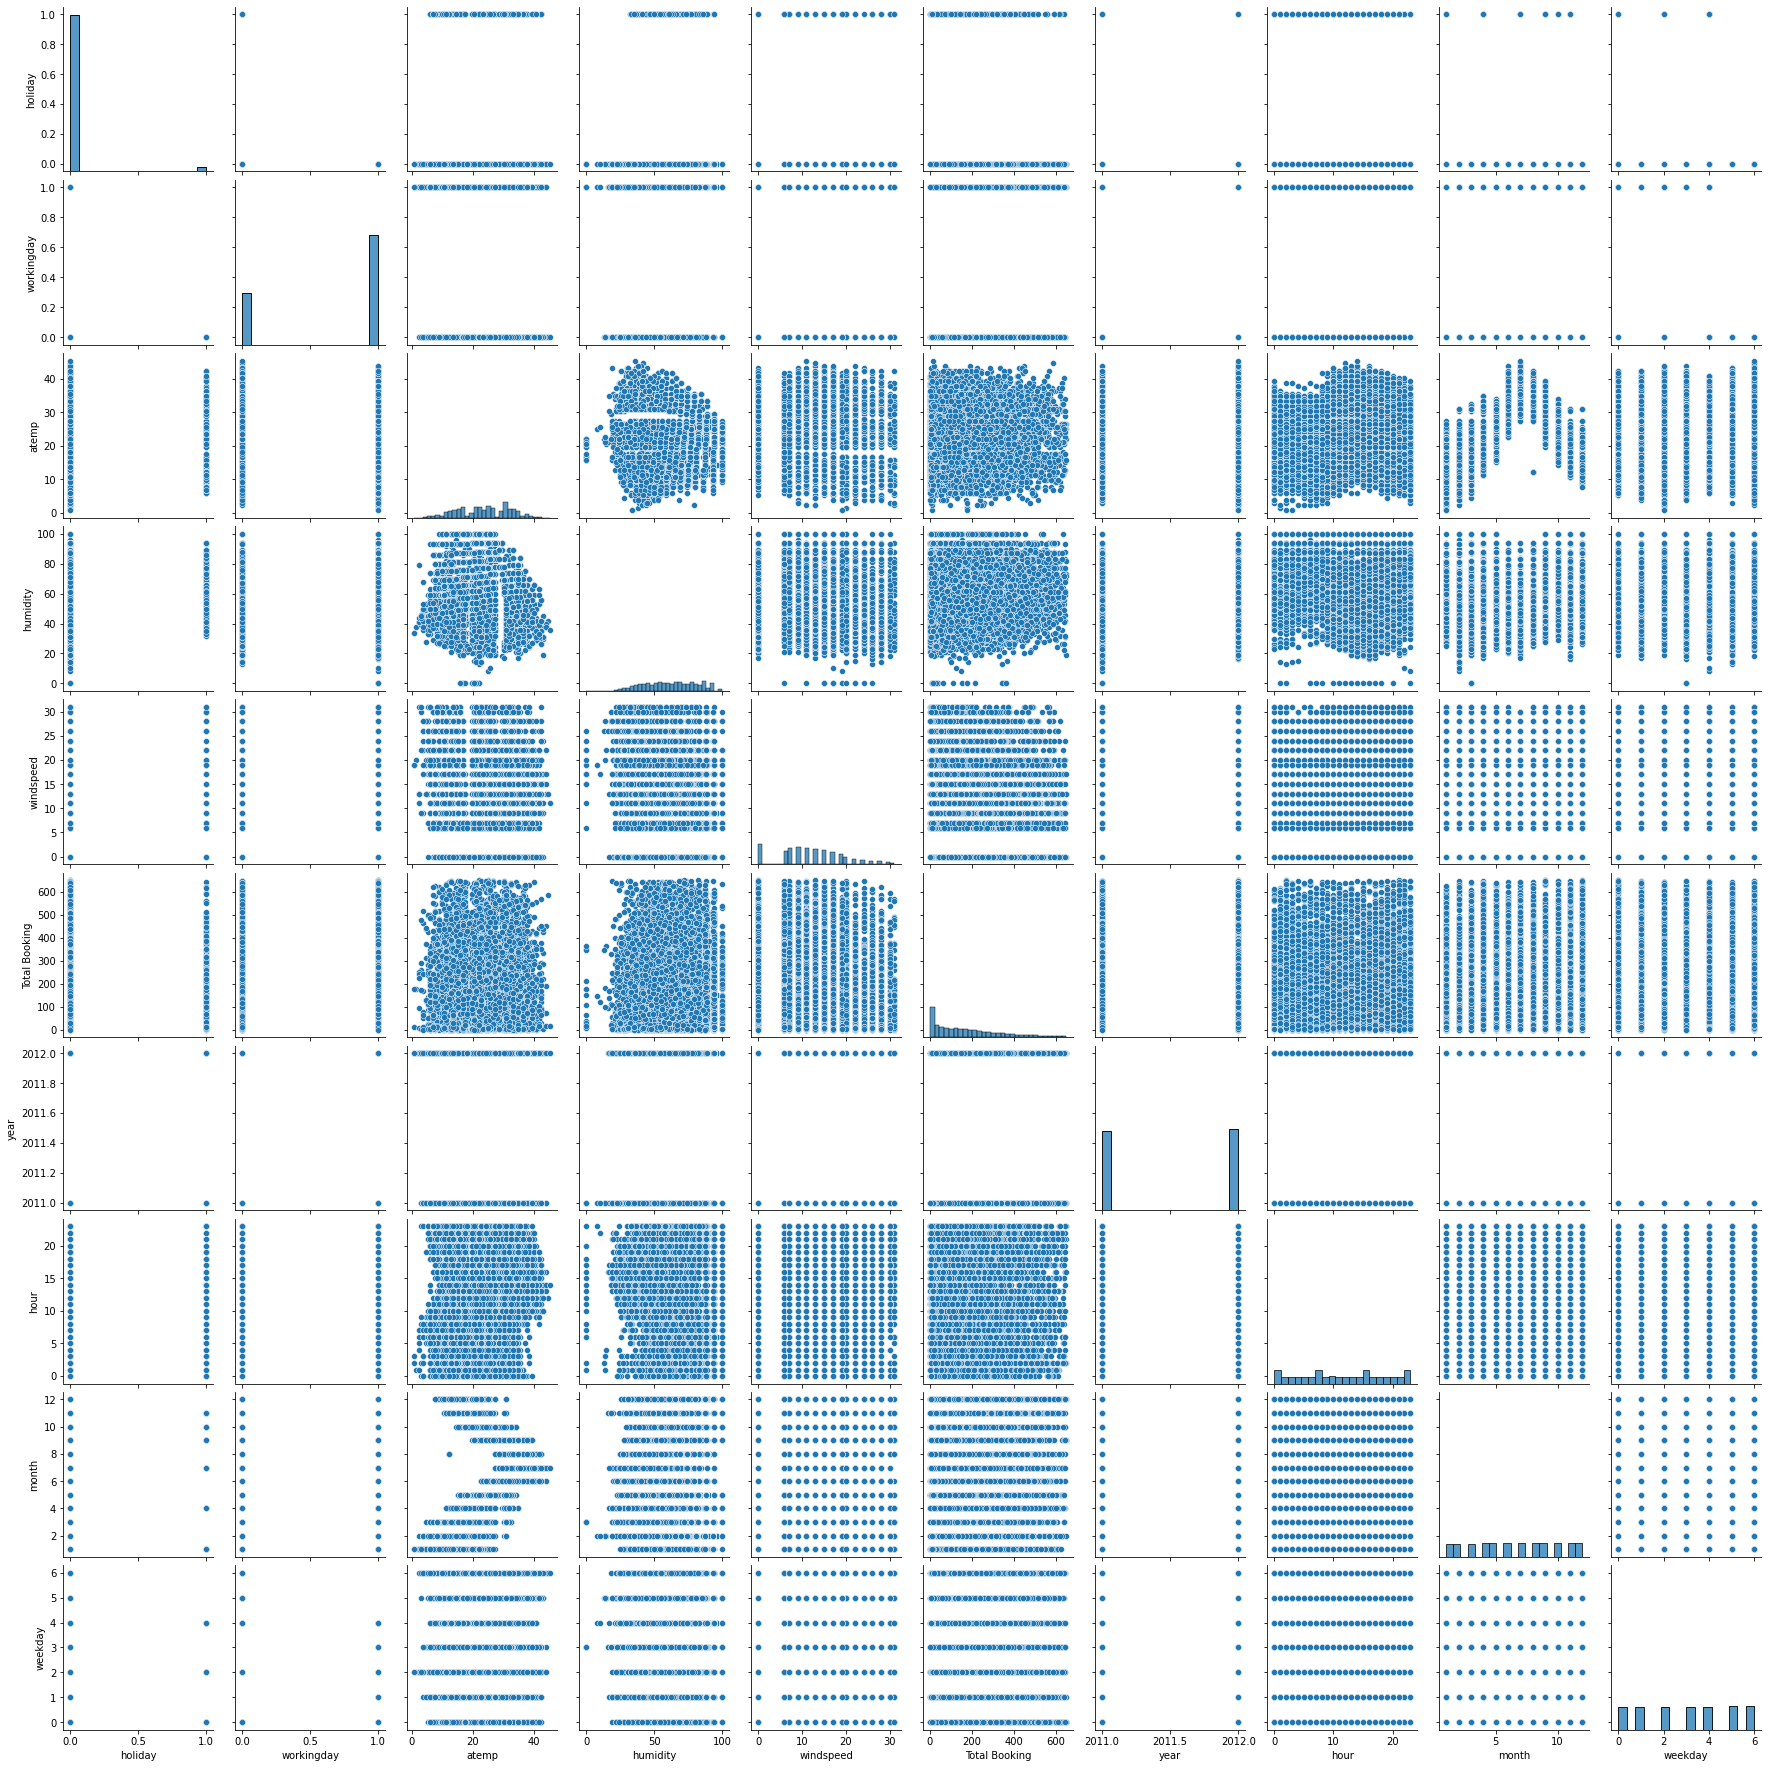

In [ ]:

sns.pairplot(df)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(df, x='season', y='Total Booking')
fig.show()

NameError: ignored

In [ ]:
fig = px.bar(df, x='month', y='Total Booking', )
fig.show()

In [ ]:
fig = px.bar(df, x='year', y='Total Booking',color='year')
fig.show()

In [ ]:
fig = px.bar(df, x='weather', y='Total Booking',color='weather')
fig.show()

In [ ]:
fig = px.bar(df, x='atemp', y='Total Booking',color='atemp')
fig.show()

When atemp is between 30-35 then cab booking is high

In [ ]:
fig = px.bar(df, x='humidity', y='Total Booking',color='humidity')
fig.show()

In [ ]:

fig = px.bar(df, x='holiday', y='Total Booking',color='holiday')
fig.show()

# 7) One Hot Encoding

In [ ]:
df

,season,holiday,workingday,weather,atemp,humidity,windspeed,Total Booking,year,hour,month,weekday
0,Summer,0,1,Clear + Few clouds,25.760,77,16.9979,5.000000,2012,19,5,2
1,Fall,0,1,Clear + Few clouds,33.335,79,19.0012,139.000000,2012,4,9,2
2,Spring,0,1,Clear + Few clouds,6.060,50,22.0028,209.000000,2011,9,1,3
3,Winter,0,1,Clear + Few clouds,16.665,29,8.9981,184.000000,2011,16,11,4
5,Fall,0,1,Clear + Few clouds,12.120,36,22.0028,395.000000,2012,17,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,Spring,1,0,Clear + Few clouds,6.820,54,6.0032,11.000000,2012,6,1,0
8704,Winter,0,1,Mist + Cloudy,20.455,87,0.0000,1.000000,2011,1,11,3
8705,Summer,0,1,Mist + Cloudy,27.275,56,8.9981,92.000000,2011,3,4,1
8706,Winter,0,1,Mist + Cloudy,13.635,61,16.9979,31.000000,2012,1,11,2


In [ ]:
df['season'].replace(to_replace=['Fall','Spring','Summer','Winter'],value=[0,1,2,3],inplace=True)

In [ ]:
df

,season,holiday,workingday,weather,atemp,humidity,windspeed,Total Booking,year,hour,month,weekday
0,2,0,1,Clear + Few clouds,25.760,77,16.9979,5.000000,2012,19,5,2
1,0,0,1,Clear + Few clouds,33.335,79,19.0012,139.000000,2012,4,9,2
2,1,0,1,Clear + Few clouds,6.060,50,22.0028,209.000000,2011,9,1,3
3,3,0,1,Clear + Few clouds,16.665,29,8.9981,184.000000,2011,16,11,4
5,0,0,1,Clear + Few clouds,12.120,36,22.0028,395.000000,2012,17,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,1,0,Clear + Few clouds,6.820,54,6.0032,11.000000,2012,6,1,0
8704,3,0,1,Mist + Cloudy,20.455,87,0.0000,1.000000,2011,1,11,3
8705,2,0,1,Mist + Cloudy,27.275,56,8.9981,92.000000,2011,3,4,1
8706,3,0,1,Mist + Cloudy,13.635,61,16.9979,31.000000,2012,1,11,2


# 8) Split your train dataset: 70:30 

In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'Total Booking', 'year', 'hour', 'month', 'weekday'],
      dtype='object')

In [ ]:
df['atemp'] = df['atemp'].astype(int)
df['windspeed'] = df['windspeed'].astype(int)

In [ ]:
df['Total Booking'] = df['Total Booking'].apply(np.int64)

In [ ]:
X = df[['hour','month','season','holiday','workingday','atemp','humidity','windspeed']]
y = df[['Total Booking']]

In [ ]:
X

,hour,month,season,holiday,workingday,atemp,humidity,windspeed
0,19,5,2,0,1,25,77,16
1,4,9,0,0,1,33,79,19
2,9,1,1,0,1,6,50,22
3,16,11,3,0,1,16,29,8
5,17,8,0,0,1,12,36,22
...,...,...,...,...,...,...,...,...
8703,6,1,1,1,0,6,54,6
8704,1,11,3,0,1,20,87,0
8705,3,4,2,0,1,27,56,8
8706,1,11,3,0,1,13,61,16


In [ ]:
y

,Total Booking
0,5
1,139
2,209
3,184
5,395
...,...
8703,11
8704,1
8705,92
8706,31


#Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
feature_Scaler = StandardScaler()
X_train = feature_Scaler.fit_transform(X_train)
X_test = feature_Scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_model = lasso.fit(X_train,y_train)
print('intercept',lasso_model.intercept_)
print('coefficient',lasso_model.coef_)
y_pred_las = lasso_model.predict(X_test)

intercept [177.27391829]
coefficient [-0.          1.17415084  0.          2.65143432  0.         -4.56472546
  0.47083685  0.        ]


# 9) Fit the models

#Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
regressor.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
pred1=regressor.predict(X_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,pred1)))

RMSE values : 167.1499512491744


#Ada Boost Regressor


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [ ]:
abr = AdaBoostRegressor(random_state=0, n_estimators=100)

In [ ]:
abr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
pred2=abr.predict(X_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,pred2)))

RMSE values : 162.4120928800981


#Bagging Regressor


In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
br = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
pred3=br.predict(X_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,pred3)))

RMSE values : 161.0194222095977


#SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
svr = SVR()

In [ ]:
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [ ]:
pred4=svr.predict(X_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,pred4)))

RMSE values : 161.03865122740123


#K-Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
pred5=knr.predict(X_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,pred5)))

RMSE values : 170.99921476880544


#10)RMSE Factor Plot

In [ ]:
DF = {'Algorithm':['R-Forest', 'AdaBst', 'BaggingR', 'SVR','KNR'],
        'RMSE':[165.99,160.87,162.97,162.93,172.32]}

In [ ]:
DF1 = pd.DataFrame(DF)

In [ ]:
DF1

,Algorithm,RMSE
0,R-Forest,165.99
1,AdaBst,160.87
2,BaggingR,162.97
3,SVR,162.93
4,KNR,172.32


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



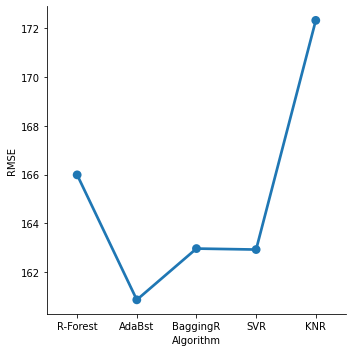

In [ ]:
sns.factorplot(x ='Algorithm', y ='RMSE', data = DF1)

#11)Hyper-parameter tuning GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
rfr = RandomForestRegressor(random_state = 1)

In [ ]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/s

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [ ]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 15}


#12) Mean Squared Log Error

In [ ]:
data1 = pd.read_csv('/content/test.csv')

In [ ]:
data2 = pd.read_csv('/content/test_label.csv')

In [ ]:
data = pd.concat([data1,data2],axis=1)

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,256
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,87.0
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.0
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.0
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,668.0
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.0
...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.0
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.0
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.0
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.0


In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
256           1
dtype: int64

In [ ]:
mean_value1 = data['256'].mean()

In [ ]:
data['256'].fillna(value=mean_value,inplace=True)

In [ ]:
data.rename(columns = {'256':'Total Booking'}, inplace = True)

In [ ]:
data.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total Booking    0
dtype: int64

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total Booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,87.000000
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.000000
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.000000
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,668.000000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.000000
...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.000000
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.000000
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.000000
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.000000


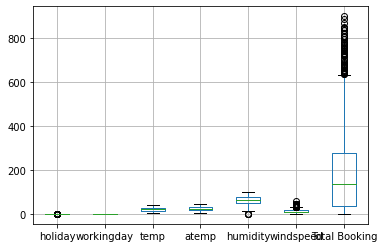

In [ ]:
boxplot = data.boxplot(column=['holiday','workingday','temp','atemp','humidity','windspeed','Total Booking'])

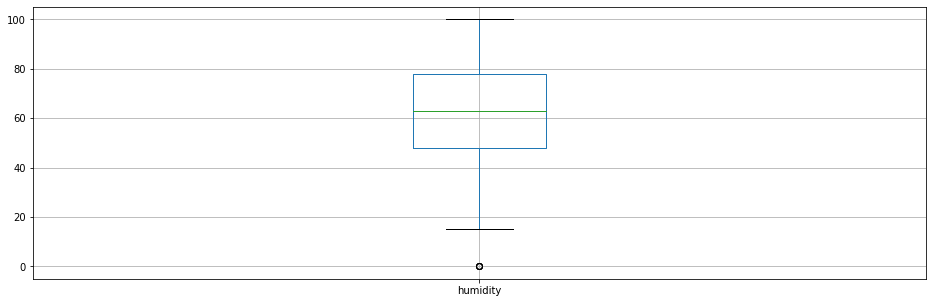

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
humidity_box = data.boxplot(column=['humidity'])

In [ ]:
Q1 = data['humidity'].quantile(0.25)
Q3 = data['humidity'].quantile(0.75)
IQR = Q3-Q1
IQR

30.0

In [ ]:
outliers = data[(data['humidity'] <(Q1 - 1.5*IQR)) | (data['humidity'] > (Q3+ 1.5*IQR))]

In [ ]:
outliers.index

Int64Index([1156, 1370, 1616, 2077], dtype='int64')

In [ ]:
data.drop(outliers.index,inplace = True)

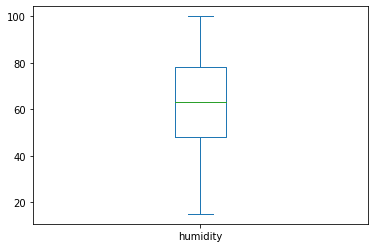

In [ ]:
data['humidity'].plot(kind = 'box')

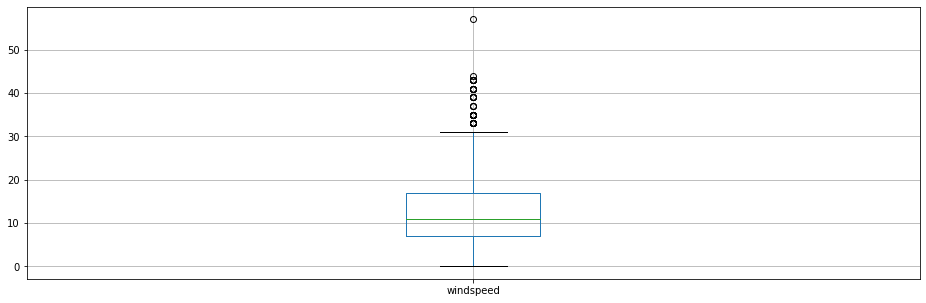

In [ ]:
plt.figure(figsize=(16,5))
windspeed_box = data.boxplot(column=['windspeed'])

In [ ]:
Q1 = data['windspeed'].quantile(0.25)
Q3 = data['windspeed'].quantile(0.75)
IQR = Q3-Q1
IQR

9.996400000000001

In [ ]:
outliers = data[(data['windspeed'] <(Q1 - 1.5*IQR)) | (data['windspeed'] > (Q3+ 1.5*IQR))]

In [ ]:
outliers.index

Int64Index([   0,   57,   60,  129,  191,  224,  332,  381,  382,  421,  449,
             458,  556,  619,  678,  696,  732,  764,  812,  815,  878,  982,
             989, 1023, 1029, 1077, 1104, 1126, 1205, 1257, 1284, 1285, 1428,
            1493, 1548, 1648, 1652, 1734, 1805, 1939, 1972, 2041, 2080, 2145,
            2149],
           dtype='int64')

In [ ]:
data.drop(outliers.index,inplace = True)

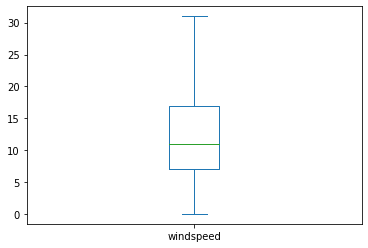

In [ ]:
data['windspeed'].plot(kind = 'box')

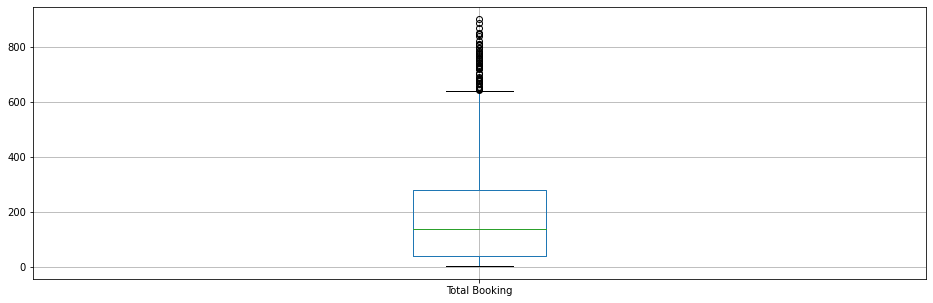

In [ ]:
plt.figure(figsize=(16,5))
Booking_box = data.boxplot(column=['Total Booking'])

In [ ]:
Q1 = data['Total Booking'].quantile(0.25)
Q3 = data['Total Booking'].quantile(0.75)
IQR = Q3-Q1
IQR

241.0

In [ ]:
outliers = data[(data['Total Booking'] <(Q1 - 1.5*IQR)) | (data['Total Booking'] > (Q3+ 1.5*IQR))]

In [ ]:
outliers.index

Int64Index([   3,    6,   49,   72,  122,  223,  234,  242,  293,  300,  310,
             324,  387,  448,  483,  497,  504,  582,  609,  631,  634,  676,
             695,  792,  796, 1007, 1043, 1052, 1074, 1089, 1097, 1105, 1139,
            1212, 1258, 1269, 1280, 1281, 1355, 1408, 1460, 1546, 1569, 1578,
            1689, 1765, 1774, 1786, 1842, 1857, 1965, 1968, 1989, 2014, 2036,
            2114, 2121],
           dtype='int64')

In [ ]:
data.drop(outliers.index,inplace=True)

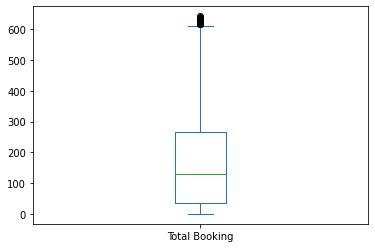

In [ ]:
data['Total Booking'].plot(kind='box')

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total Booking
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.000000
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.000000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.000000
5,4/1/2011 23:00,Summer,0,1,Clear + Few clouds,12.30,15.910,61,6.0032,237.000000
7,11/1/2012 18:00,Winter,0,1,Mist + Cloudy,16.40,20.455,50,11.0014,520.000000
...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.000000
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.000000
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.000000
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.000000


In [ ]:
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['hour'] = pd.DatetimeIndex(data['datetime']).hour
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['weekday'] = pd.DatetimeIndex(data['datetime']).weekday

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total Booking,year,hour,month,weekday
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.000000,2012,7,6,5
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.000000,2011,20,3,6
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.000000,2012,12,6,5
5,4/1/2011 23:00,Summer,0,1,Clear + Few clouds,12.30,15.910,61,6.0032,237.000000,2011,23,4,4
7,11/1/2012 18:00,Winter,0,1,Mist + Cloudy,16.40,20.455,50,11.0014,520.000000,2012,18,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.000000,2012,3,3,3
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.000000,2012,12,1,3
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.000000,2012,22,3,2
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.000000,2011,5,5,3


In [ ]:
data.drop(['datetime'], axis=1,inplace = True)

In [ ]:
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total Booking,year,hour,month,weekday
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.000000,2012,7,6,5
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.000000,2011,20,3,6
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.000000,2012,12,6,5
5,Summer,0,1,Clear + Few clouds,12.30,15.910,61,6.0032,237.000000,2011,23,4,4
7,Winter,0,1,Mist + Cloudy,16.40,20.455,50,11.0014,520.000000,2012,18,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,144.000000,2012,3,3,3
2174,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,159.000000,2012,12,1,3
2175,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,29.000000,2012,22,3,2
2176,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,224.000000,2011,5,5,3


In [ ]:
data['season'].replace(to_replace=['Fall','Spring','Summer','Winter'],value=[0,1,2,3],inplace=True)

In [ ]:
data['atemp'] = data['atemp'].astype(int)
data['windspeed'] = data['windspeed'].astype(int)

In [ ]:
data['Total Booking'] = data['Total Booking'].apply(np.int64)

In [ ]:
X1 = df[['hour','month','season','holiday','workingday','atemp','humidity','windspeed']]
y1 = df[['Total Booking']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3)

In [ ]:
feature_Scaler1 = StandardScaler()
X1_train = feature_Scaler.fit_transform(X1_train)
X1_test = feature_Scaler.transform(X1_test)

In [ ]:
lasso1 = Lasso()
lasso_model1 = lasso1.fit(X1_train,y1_train)
print('intercept',lasso_model1.intercept_)
print('coefficient',lasso_model1.coef_)
y_pred_las1 = lasso_model1.predict(X1_test)

intercept [177.66505775]
coefficient [ 0.          0.         -0.          0.25672888  0.78403302 -2.93150687
  2.04797221  0.80575276]


#RandomForest

In [ ]:
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
regressor1.fit(X1_train, y1_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=0)

In [ ]:
Pred1=regressor.predict(X1_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,Pred1)))

RMSE values : 182.2466970485338


In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
mean_squared_log_error( y1_test, Pred1, squared=False)# RandomForest

1.2035881138245552

#AdaBoost

In [ ]:
abr1 = AdaBoostRegressor(random_state=0, n_estimators=100)

In [ ]:
abr1.fit(X1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
Pred2=abr1.predict(X1_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,Pred2)))

RMSE values : 162.6722696173017


In [ ]:
mean_squared_log_error( y1_test, Pred2, squared=False)#AdaBoot

1.6065666748804406

#BaggingRegressor

In [ ]:
br1 = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
Pred3=br1.predict(X1_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,Pred3)))

RMSE values : 161.0479420322707


In [ ]:
mean_squared_log_error( y1_test, Pred3, squared=False)#BaggingRegression

1.4433799611783305

#SVR

In [ ]:
svr1 = SVR()

In [ ]:
svr1.fit(X1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [ ]:
Pred4=svr1.predict(X1_test)

In [ ]:
print('RMSE values :',np.sqrt(MSE(y_test,Pred4)))

RMSE values : 161.21747516942406


In [ ]:
mean_squared_log_error( y1_test, Pred3, squared=False)#SVR

1.4433799611783305

#K-Neighbors Regressor

In [ ]:
knr1 = KNeighborsRegressor()

In [ ]:
knr1.fit(X1_train,y1_train)

KNeighborsRegressor()

In [ ]:
Pred5 = knr1.predict(X1_test)

In [ ]:
mean_squared_log_error( y1_test, Pred5, squared=False)#KNR

1.5646417897600682